In [1]:
%reload_ext autoreload
%autoreload 2
%aimport
#%matplotlib inline
#%reload_ext memory_profiler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

import seaborn

import os
import cPickle

try:
    _path = os.path.abspath(os.path.join(os.path.dirname(__file__), '..'))
except:
    _path = os.path.abspath(os.path.join(os.path.dirname('__file__'), '..'))
if not _path in os.sys.path:
    os.sys.path.insert(1, _path)
del _path

from ws3.woodstock import WoodstockModel

model_name = 'PC_4537_U03153_4FF_V05'
model_path = '../../dat/woodstock/03153'

Modules to reload:
all-except-skipped

Modules to skip:



OSError: Cannot load library /Users/greg/.virtualenvs/wm3-pypy/site-packages/numpy/linalg/libumath_linalg_cffi.so: dlopen(/Users/greg/.virtualenvs/wm3-pypy/site-packages/numpy/linalg/libumath_linalg_cffi.so, 2): image not found

In [2]:
def load_woodstockmodel(load_pickle='', dump_pickle='', verbose=True):
    if load_pickle:
        return cPickle.load(open(load_pickle))
    wm = WoodstockModel(model_name, model_path)
    if verbose: print 'importing CONSTANTS section'
    wm.import_constants_section()
    if verbose: print 'importing LANDSCAPE section'
    wm.import_landscape_section()
    if verbose: print 'importing AREAS section'
    wm.import_areas_section()
    if verbose: print 'importing YIELDS section'
    wm.import_yields_section()
    if verbose: print 'importing ACTIONS section'
    wm.import_actions_section()
    if verbose: print 'importing TRANSITIONS section'
    wm.import_transitions_section()
    if verbose: print 'importing OUTPUTS section'
    wm.import_outputs_section()
    if dump_pickle:
        cPickle.dump(wm, open(dump_pickle, 'w'))
    return wm

In [3]:
wm = load_woodstockmodel()

importing CONSTANTS section
import_constants_section took 0.004 seconds.
importing LANDSCAPE section
import_landscape_section took 0.015 seconds.
importing AREAS section
import_areas_section took 1.514 seconds.
importing YIELDS section
import_yields_section took 17.798 seconds.
importing ACTIONS section
import_actions_section took 1.529 seconds.
importing TRANSITIONS section
import_transitions_section took 4.074 seconds.
importing OUTPUTS section
import_outputs_section took 6.395 seconds.


In [4]:
wm.initialize_areas() 
wm.grow()

In [5]:
def calc_outputs(wm, ocodes, period):
    return {ocode:wm.outputs[ocode](period) for ocode in ocodes}

In [9]:
periods = range(1, 30)
orslts = {p:{} for p in periods}
#ocodes = ['osupinc',
#          'osupexin',
#          'osuptot',
#          'osupexti',
#          'ovoltotpiedinc']
ocodes = ['ovoltotpiedinc', 'ovoltotrecct']

In [10]:
skip_existing = 0
_ocodes = [c for c in ocodes if c not in orslts] if skip_existing else ocodes
for p in periods:
    orslts[p].update(calc_outputs(wm, _ocodes, p))

In [8]:
for ocode in ocodes:
    print wm.outputs[ocode].description
    for p in periods:
        print p, orslts[p][ocode]

volume total surpied inclusactions
1 5560490.47201
volume total recolte coupes totales
1 0.0


In [9]:
filename = 'ovoltotpiedinc_validate_bfec.dat' 
with open(filename) as f: 
    validate = [float(line) for line in f.readlines()]

In [12]:
#df = pd.DataFrame(zip([[orslts[p][ocode] for ocode in ocodes] for p in periods], validate), columns=ocodes+['validate'])
df = pd.DataFrame([[orslts[p][ocode] for ocode in ocodes] for p in periods], columns=ocodes)

NameError: name 'periods' is not defined

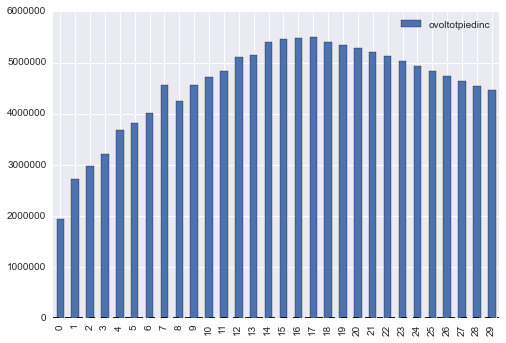

In [25]:
ax = df.plot(kind='bar')
ax.get_figure().savefig('ovoltotpiedinc', format='png')

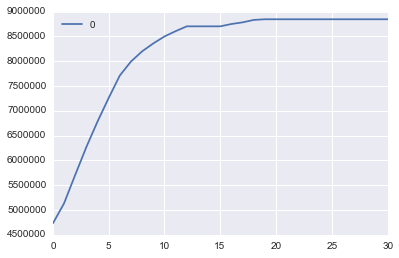

In [22]:
df2 = pd.DataFrame(validate)
df2.plot()

In [43]:
mask = tuple('GS0002 FORESTIER 1 SR0084 FC0022 NAT O EXHU ZT0001 NA M2 AU12 NA NA ORPH EV8 NA NA ECO4 NA'.lower().split())
dt = wm.dtypes[mask]
area = dt.area(0, 16)
tv = dt.ycomp('yv_s')[16]
tgs = area * tv
print area, tv, tgs

1.2 115.6 138.72


In [82]:
zip(df['ovoltotpiedinc'], validate)

[(4728352.4400000097, 4728352.44),
 (5604724.7400000086, 5132943.2),
 (6500843.470000023, 5706093.66),
 (7396004.2800000217, 6269185.51),
 (8218657.0700000087, 6782413.78),
 (8993922.1600000132, 7258115.76),
 (9702526.200000003, 7711335.94),
 (10344597.189999992, 7993193.04),
 (10880173.269999996, 8199113.76),
 (11326993.849999987, 8358659.48),
 (11736878.279999968, 8498650.96),
 (12096821.019999994, 8605660.3),
 (12383812.959999973, 8702856.49),
 (12593658.529999949, 8702856.49),
 (12737040.269999959, 8702856.49),
 (12826381.520000031, 8702856.49),
 (12888107.609999964, 8749861.53),
 (12886544.579999994, 8782926.41),
 (12834162.109999955, 8832201.88),
 (12735500.42999999, 8845505.18),
 (12602551.959999973, 8845505.18),
 (12445064.939999986, 8845505.18),
 (12266123.599999957, 8845505.18),
 (12067495.700000037, 8845505.18),
 (11859133.919999976, 8845505.18),
 (11640527.780000014, 8845505.18),
 (11416306.010000005, 8845505.18),
 (11190821.82, 8845505.18),
 (10966437.320000011, 8845505.18

In [76]:
print validate

[4728352.44, 5132943.2, 5706093.66, 6269185.51, 6782413.78, 7258115.76, 7711335.94, 7993193.04, 8199113.76, 8358659.48, 8498650.96, 8605660.3, 8702856.49, 8702856.49, 8702856.49, 8702856.49, 8749861.53, 8782926.41, 8832201.88, 8845505.18, 8845505.18, 8845505.18, 8845505.18, 8845505.18, 8845505.18, 8845505.18, 8845505.18, 8845505.18, 8845505.18, 8845505.18, 8845505.18]


In [14]:
print "Calculating operable area for clearcut treatment 'act1'"
print "[period][ageclass][area]"
def foo():
    for p in wm.periods[:3]:
        print 'scanning period', p
        for age in sorted(wm.ages):
            oa = wm.operable_area('act1', p, age)
            if oa > 0: 
                print p, age, oa
%timeit foo()

Calculating operable area for clearcut treatment 'act1'
[period][ageclass][area]
scanning period 1
1 13 789.8
1 14 1073.5
1 15 306.6
1 16 3004.3
1 17 853.9
1 18 523.0
1 19 360.7
1 21 1004.3
1 22 378.3
1 23 717.5
1 25 420.2
scanning period 2
2 12 1083.7
2 13 575.7
2 14 789.8
2 15 1617.3
2 16 862.6
2 17 3004.3
2 18 2247.0
2 19 523.0
2 20 360.7
2 22 1004.3
2 23 378.3
2 24 717.5
2 26 420.2
scanning period 3
3 13 1083.7
3 14 575.7
3 15 6994.9
3 16 1617.3
3 17 862.6
3 18 3004.3
3 19 2247.0
3 20 2456.9
3 21 360.7
3 23 1004.3
3 24 378.3
3 25 717.5
3 27 420.2
scanning period 1
1 13 789.8
1 14 1073.5
1 15 306.6
1 16 3004.3
1 17 853.9
1 18 523.0
1 19 360.7
1 21 1004.3
1 22 378.3
1 23 717.5
1 25 420.2
scanning period 2
2 12 1083.7
2 13 575.7
2 14 789.8
2 15 1617.3
2 16 862.6
2 17 3004.3
2 18 2247.0
2 19 523.0
2 20 360.7
2 22 1004.3
2 23 378.3
2 24 717.5
2 26 420.2
scanning period 3
3 13 1083.7
3 14 575.7
3 15 6994.9
3 16 1617.3
3 17 862.6
3 18 3004.3
3 19 2247.0
3 20 2456.9
3 21 360.7
3 23 1004.3


In [51]:
wm.operable_area('act1', 10, 22)

29.8

In [56]:
wm.periods

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

In [11]:
mask = tuple('GS0002 Forestier Toutes SR0084 ? NAT ? INC ? ? ? ? ? ? ? ? ? ? ? ?'.lower().split(' '))
dtks = wm.unmask(mask)
len(dtks)

221

In [48]:
period = 10
ages = set()
for dtk in dtks[:]:
    dt = wm.dtypes[dtk]
    _ages = map(int, dt._areas[period].keys())
    print ' '.join(dtk), dt.area(period), _ages
    map(ages.add, _ages)

print ages


gs0002 forestier 1 sr0084 fc0022 nat o inc zt0001 na m1 au18 b1 na refa na na tf1 eco2 na 15.0 [26, 22]
gs0002 forestier 1 sr0084 fc0022 nat o inc zt0001 na na na na na refa na na tf1 eco5 na 25.8 [26, 22]
gs0002 forestier 1 sr0084 fc0022 nat o inc zt0001 na na au21 na na peec na na tf1 zaf3 na 12.1 [21, 22, 23]
gs0002 forestier 1 sr0084 fc0022 nat o inc zt0001 na m1 na na na orph ev17 na tf1 na na 0.5 [26]
gs0002 forestier 1 sr0084 fc0022 nat o inc zt0001 na na au20 na na hae2 ev6 he2 tf1 zaf6 na 0.7 [23]
gs0002 forestier 1 sr0084 fc0022 nat o inc zt0001 na m1 au10 na na peec na na tf1 zaf2 na 0.3 [26]
gs0002 forestier 1 sr0084 fc0022 nat o inc zt0001 na m1 au1 na na peec ev17 na tf1 eco6 na 0.8 [26]
gs0002 forestier 1 sr0084 fc0022 nat o inc zt0001 na m3 au17 na na orph na na tf1 zaf2 na 16.2 [22]
gs0002 forestier 1 sr0084 fc0022 nat o inc zt0001 na na au20 na na peec na na tf1 eco2 na 0.6 [22, 23]
gs0002 forestier 1 sr0084 fc0022 nat o inc zt0001 na m1 au19 b1 na refa na na tf1 zaf6

In [18]:
dt = wm.dtypes[dtks[0]]
dt.operability['act1']
getsize.asizeof(dt.operability['act'])

NameError: name 'getsize' is not defined

In [28]:
dt.compile_actions()

expr yagemat >= 0 and yagemat <= 10
expr _cp = 1 and yg_s <= 33
expr yagemat >= 0 and yagemat <= 10


In [12]:
len(wm.dtypes.keys())

15071

In [47]:
dt.operability['act2']

{1: (18.0, 28.0),
 2: (18.0, 28.0),
 3: (18.0, 28.0),
 4: (18.0, 28.0),
 5: (18.0, 28.0),
 6: (18.0, 28.0),
 7: (18.0, 28.0),
 8: (18.0, 28.0),
 9: (18.0, 28.0),
 10: (18.0, 28.0),
 11: (18.0, 28.0),
 12: (18.0, 28.0),
 13: (18.0, 28.0),
 14: (18.0, 28.0),
 15: (18.0, 28.0),
 16: (18.0, 28.0),
 17: (18.0, 28.0),
 18: (18.0, 28.0),
 19: (18.0, 28.0),
 20: (18.0, 28.0),
 21: (18.0, 28.0),
 22: (18.0, 28.0),
 23: (18.0, 28.0),
 24: (18.0, 28.0),
 25: (18.0, 28.0),
 26: (18.0, 28.0),
 27: (18.0, 28.0),
 28: (18.0, 28.0),
 29: (18.0, 28.0),
 30: (18.0, 28.0)}

In [30]:
dt._areas[1].keys()

[17, 13]

In [21]:
import getsize
getsize.asizeof(dt.operability['act1'])

3392

In [27]:
x = 10.
l = [x for i in range(10)]

In [28]:
getsize.asizeof(l)

120

In [26]:
getsize.asizeof([1. for i in range(10)])

120

In [31]:
class Foo():
    data = 1
    
foo = Foo()
getsize.asizeof([Foo() for i in range(10)])

1944

In [34]:
getsize.asizeof(wm)

523799304

In [33]:
dt

<ws3.woodstock.DevelopmentType instance at 0x3a670d0>

In [5]:
operable = wm.operable_dtypes('act1', 10)

In [6]:
dtk, ages = operable.items()[0]
dt = wm.dtypes[dtk]

In [7]:
operable_area = dt.operable_area('act1', 10, ages[0])
operable_area

0.2

In [8]:
wm.apply_action(dtk, 'act1', 10, ages[0], operable_area)

In [10]:
dt.area(10, ages[0], 10.) # add some area, for testing

In [11]:
wm.applied_actions

In [16]:
bool(wm.applied_actions[10]['act1'][dtk][ages[0]])

False

In [17]:
wm.reset_actions()

[autoreload of ws3.woodstock failed: Traceback (most recent call last):
  File "/Library/Python/2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "/Users/greg/Developer/postdoc/src/ws3/woodstock.py", line 707
    if period = None:
              ^
SyntaxError: invalid syntax
]


AttributeError: WoodstockModel instance has no attribute 'reset_actions'

In [13]:
wm.operated_area(10, 'act1')

0.2

In [20]:
def cutcutcut(wm, acode, target_area, period=None, commit=True):
    if period is None:
        for period in wm.periods:
            # MUST commit at each iteration, else nonsense
            cutcutcut(wm, acode, target_area, period, commit=True)
    else:
        odt = wm.operable_dtypes(acode, period)
        operated_area = 0.
        while operated_area < target_area and odt:
            dtk, ages = odt.popitem()
            ages.sort()
            while operated_area < target_area and ages:
                age = ages.pop()
                operable_area = wm.dtypes[dtk].operable_area(acode, period, age)
                area = min(operable_area, target_area - operated_area)
                wm.apply_action(dtk, acode, period, age, area)
                operated_area += area
        if commit: wm.commit_actions(period)

In [53]:
period = 1
wm.reset_actions(period)
wm.initialize_areas()
wm.grow()
cutcutcut(wm, 'act1', 100., period)

growing period 1
repairing actions in period 2
growing period 2
repairing actions in period 3
growing period 3
repairing actions in period 4
growing period 4
repairing actions in period 5
growing period 5
repairing actions in period 6
growing period 6
repairing actions in period 7
growing period 7
repairing actions in period 8
growing period 8
repairing actions in period 9
growing period 9
repairing actions in period 10
growing period 10
repairing actions in period 11
growing period 11
repairing actions in period 12
growing period 12
repairing actions in period 13
growing period 13
repairing actions in period 14
growing period 14
repairing actions in period 15
growing period 15
repairing actions in period 16
growing period 16
repairing actions in period 17
growing period 17
repairing actions in period 18
growing period 18
repairing actions in period 19
growing period 19
repairing actions in period 20
growing period 20
repairing actions in period 21
growing period 21
repairing actions i

In [29]:
import copy
wm.applied_actions
aa = copy.copy(wm.applied_actions)
wm.reset_actions()
aa[1]
wm.applied_actions[1]

defaultdict(<bound method WoodstockModel._rdd of <ws3.woodstock.WoodstockModel instance at 0x36560f8>>, {})

In [8]:
wm.commit_actions()

In [64]:
cutcutcut(wm, 'act1', 100., 1)
wm.operated_area('act1', 1)

source na na na na fc_che na na na zt0001 na na au5 na na hae3 na he3 tf1 eco5 na
target ? ? ? sr0013 fc0060 ? n ? ? ? ? ? ? ? ? ? ? ? ? ? 0.956 0 None (2, '_TH3 + 1') None
dtk na na na sr0013 fc0060 na n na zt0001 na na au5 na na hae3 na he3 tf1 eco5 na


NameError: name 'na' is not defined

In [41]:
for p in range(1, 2): print wm.operable_area('act1', 1)

4914.0376


In [18]:
mask = tuple('GS0002 Forestier Toutes SR0084 ? NAT ? INC ? ? ? ? ? ? ? ? ? ? ? ?'.lower().split(' '))
dtks = wm.unmask(mask)
dt = wm.dtypes[dtks[0]]
yv_s = copy.deepcopy(dt.ycomp('yv_s'))
yv_s.is_locked = False

sum of y-values and point count 10721.6 47
sum of y-values and point count 10710.95 11


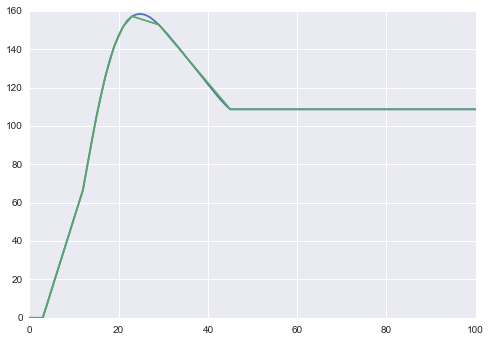

In [19]:
plt.close('all')
fig, ax = plt.subplots()

x, y = zip(*yv_s.points())
ax.plot(x, y)
print 'sum of y-values and point count',  sum(yv_s), len(yv_s.points())

yv_s.simplify()

x, y = zip(*yv_s.points())
ax.plot(x, y)
print 'sum of y-values and point count', sum(yv_s), len(yv_s.points())

no compression: %i points 47
compressed at epsilon  0.1 2.33174153111e-05 35 10721.85 10721.6
compressed at epsilon  0.2 0.000447694373974 27 10716.8 10721.6
compressed at epsilon  0.3 0.000139904491867 23 10720.1 10721.6
compressed at epsilon  0.4 0.000153894941054 22 10719.95 10721.6
compressed at epsilon  0.5 0.000172548873303 21 10719.75 10721.6
compressed at epsilon  0.6 0.000172548873303 21 10719.75 10721.6
compressed at epsilon  0.7 0.000172548873303 21 10719.75 10721.6
compressed at epsilon  0.8 0.000769474705268 15 10713.35 10721.6
error threshold exceeded 0.000769474705268


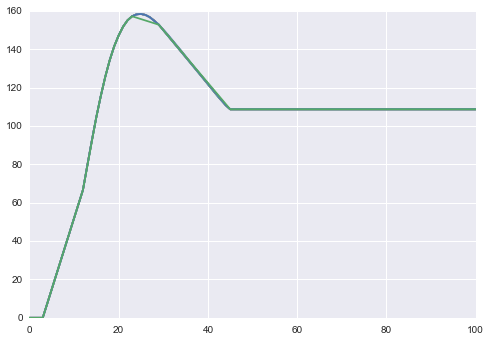

In [16]:
plt.close('all')
fig, ax = plt.subplots()
print 'no compression: %i points', len(yv_s.points())
e = 0.
for epsilon in np.arange(0.1, 10.0, 0.1):
    if e > max_e:
        print 'error threshold exceeded', e
        break
    yv_s.epsilon = epsilon
    yv_s.simplify()
    x, y = zip(*yv_s.points())
    ax.plot(x, y)
    e = abs(sum(yv_s) - ref_val) / ref_val
    print 'compressed at epsilon ', epsilon, e, len(yv_s.points()), sum(yv_s), ref_val


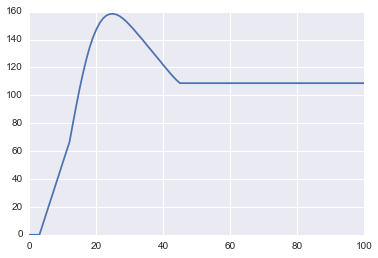

In [116]:
plt.close('all')
fig, ax = plt.subplots()
#axes.plot(zip(*yv_s.points))
x, y = zip(*yv_s.points)
#df = pd.DataFrame(yv_s.points)
#df.plot()
ax.plot(x, y)


In [68]:
df = pd.DataFrame(yv_s.points)

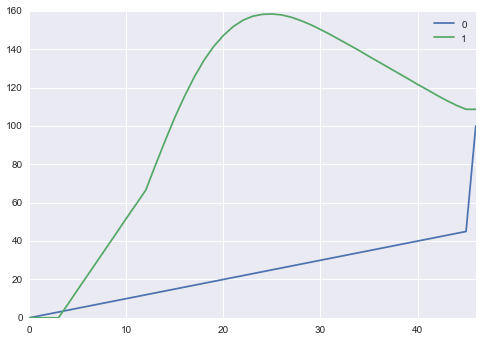

In [69]:
df.plot()

In [74]:
yv_s.is_locked = False
yv_s.points

[(0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 7.3),
 (5, 14.8),
 (6, 22.2),
 (7, 29.6),
 (8, 37.0),
 (9, 44.4),
 (10, 51.9),
 (11, 59.2),
 (12, 66.6),
 (13, 79.7),
 (14, 92.4),
 (15, 104.6),
 (16, 115.6),
 (17, 125.6),
 (18, 134.3),
 (19, 141.5),
 (20, 147.2),
 (21, 151.8),
 (22, 155.1),
 (23, 157.2),
 (24, 158.2),
 (25, 158.4),
 (26, 157.9),
 (27, 156.7),
 (28, 154.9),
 (29, 152.8),
 (30, 150.3),
 (31, 147.7),
 (32, 144.9),
 (33, 142.1),
 (34, 139.3),
 (35, 136.3),
 (36, 133.4),
 (37, 130.5),
 (38, 127.6),
 (39, 124.7),
 (40, 121.7),
 (41, 118.9),
 (42, 116.0),
 (43, 113.3),
 (44, 110.8),
 (45, 108.7),
 (100, 108.7)]

In [ ]:
i